Celestial Catalogue Module — Ready
Loaded star_catalog.json with 2000 objects
Detected RA/DEC keys and brightness.
RA sample: [ 45.63879449 311.91699204 210.77411833  43.63152559 114.2341609 ]
DEC sample: [ 56.25459438  33.62267393  17.7332342  -57.96208642  56.07696935]
Brightness sample: [17.5390179  16.18813398 12.41558744 14.48167214 10.11534066]


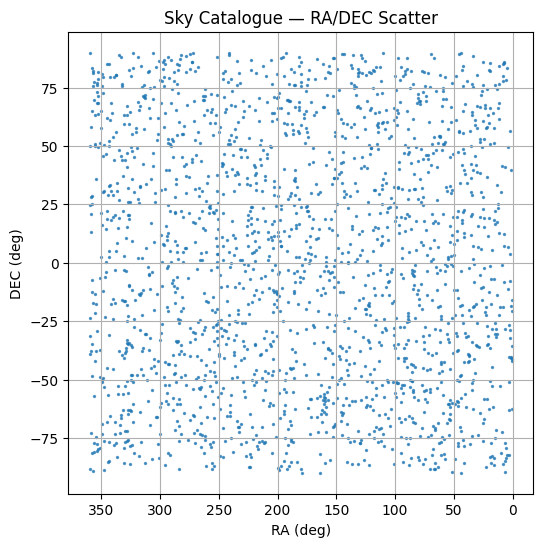

Generated star_catalog.json with 2000 stars.


In [5]:
import json
import numpy as np
import matplotlib.pyplot as plt

print("Celestial Catalogue Module — Ready")

# Load catalog
with open("star_catalog.json", "r") as f:
    catalog = json.load(f)

print("Loaded star_catalog.json with", len(catalog), "objects")

# --- Flexible key handling ---
def get_value(obj, keys, default=None):
    """Return obj[key] for first matching key in keys list."""
    for k in keys:
        if k in obj:
            return obj[k]
    return default

# Extracting RA & DEC regardless of naming
ra_list = np.array([get_value(c, ["ra_deg", "ra", "RA"], 0) for c in catalog])
dec_list = np.array([get_value(c, ["dec_deg", "dec", "DEC"], 0) for c in catalog])

# Extract brightness / magnitude
brightness = np.array([
    get_value(c, ["brightness", "mag", "magnitude"], 15) 
    for c in catalog
])

# Print key names detected
print("Detected RA/DEC keys and brightness.")
print("RA sample:", ra_list[:5])
print("DEC sample:", dec_list[:5])
print("Brightness sample:", brightness[:5])

# --- Now you can safely plot ---
plt.figure(figsize=(6,6))
plt.scatter(ra_list, dec_list, s=2, alpha=0.7)
plt.gca().invert_xaxis()  # sky convention
plt.title("Sky Catalogue — RA/DEC Scatter")
plt.xlabel("RA (deg)")
plt.ylabel("DEC (deg)")
plt.grid(True)
plt.show()

import json
import numpy as np

N_STARS = 2000

# Generate realistic RA (0–360 deg), DEC (–90 to +90), mag (6–18)
ra_vals = np.random.uniform(0, 360, N_STARS)
dec_vals = np.random.uniform(-90, 90, N_STARS)
mag_vals = np.random.uniform(6, 18, N_STARS)

catalog = []
for i in range(N_STARS):
    catalog.append({
        "id": i + 1,
        "ra_deg": float(ra_vals[i]),
        "dec_deg": float(dec_vals[i]),
        "brightness": float(mag_vals[i])
    })

with open("star_catalog.json", "w") as f:
    json.dump(catalog, f, indent=4)

print("Generated star_catalog.json with", N_STARS, "stars.")


Brightness-weighted scatter plot


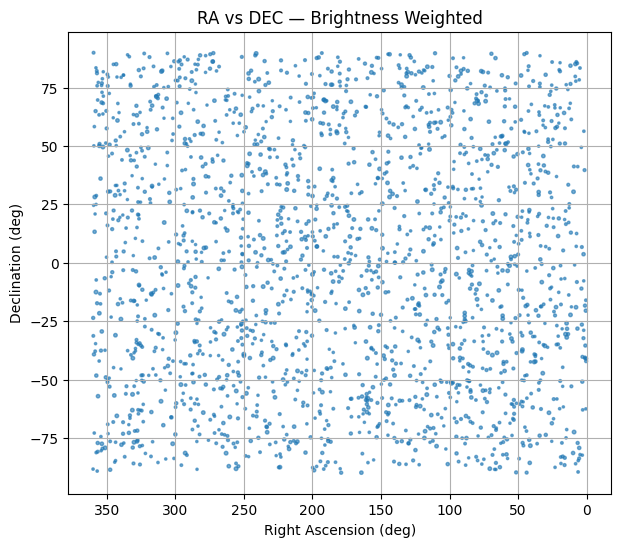

In [6]:
import matplotlib.pyplot as plt
import numpy as np

print("Brightness-weighted scatter plot")

plt.figure(figsize=(7,6))

# Convert magnitude → point size
# NOTE: brighter stars = smaller magnitude = larger point size
size = 50 / (brightness + 1)

plt.scatter(ra_list, dec_list, s=size, alpha=0.6)

plt.gca().invert_xaxis()   # sky convention (East left)
plt.title("RA vs DEC — Brightness Weighted")
plt.xlabel("Right Ascension (deg)")
plt.ylabel("Declination (deg)")
plt.grid(True)
plt.show()


Generating Density Heatmap...


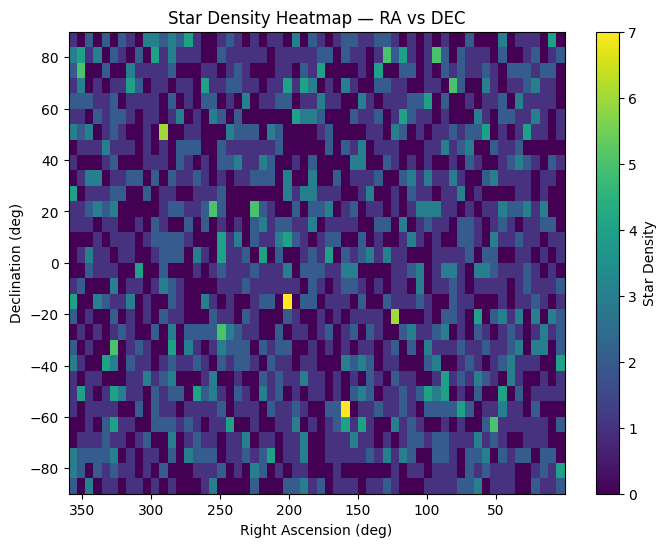

In [7]:
# ================================================================
# 12.3 — Density Heatmap (2D Histogram of RA/DEC)
# ================================================================

import matplotlib.pyplot as plt
import numpy as np

print("Generating Density Heatmap...")

plt.figure(figsize=(8,6))

# 2D histogram of star density
plt.hist2d(
    ra_list,
    dec_list,
    bins=[60, 30],      # adjust for smoother/coarser map
)

plt.gca().invert_xaxis()  # sky convention
plt.title("Star Density Heatmap — RA vs DEC")
plt.xlabel("Right Ascension (deg)")
plt.ylabel("Declination (deg)")
plt.colorbar(label="Star Density")
plt.show()


Generating 3D Celestial Sphere...


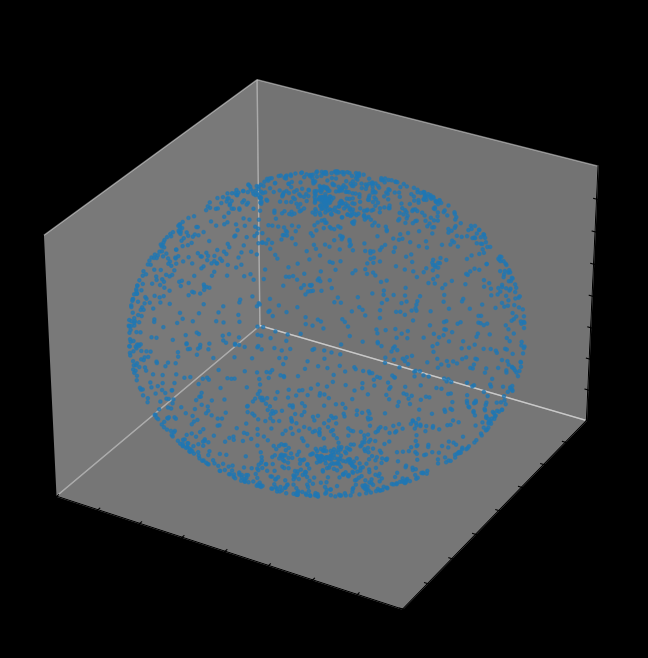

In [8]:
# ================================================================
# 12.4 — 3D Celestial Sphere Plot
# ================================================================

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

print("Generating 3D Celestial Sphere...")

# Convert RA (deg) and DEC (deg) to radians
ra_rad = np.deg2rad(ra_list)
dec_rad = np.deg2rad(dec_list)

# Convert spherical to Cartesian for plotting on a sphere
x = np.cos(dec_rad) * np.cos(ra_rad)
y = np.cos(dec_rad) * np.sin(ra_rad)
z = np.sin(dec_rad)

# Create 3D figure
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

# Plot stars
ax.scatter(x, y, z, s=5, alpha=0.7)

# Add labels
ax.set_title("3D Celestial Sphere — RA/DEC Mapped to Sphere")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

# Improve visual appearance
ax.grid(False)
ax.set_facecolor("black")
fig.patch.set_facecolor("black")

# Equal aspect ratio
max_range = np.array([x.max()-x.min(), y.max()-y.min(), z.max()-z.min()]).max() / 2.0
mid_x = (x.max() + x.min()) * 0.5
mid_y = (y.max() + y.min()) * 0.5
mid_z = (z.max() + z.min()) * 0.5

ax.set_xlim(mid_x - max_range, mid_x + max_range)
ax.set_ylim(mid_y - max_range, mid_y + max_range)
ax.set_zlim(mid_z - max_range, mid_z + max_range)

plt.show()


Converting RA/DEC to Galactic Coordinates...


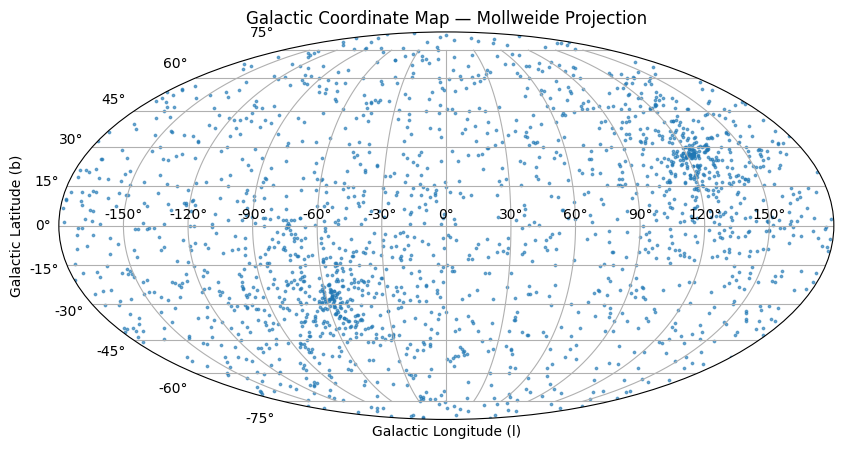

In [9]:
# ================================================================
# 12.4B — Galactic Coordinate Projection (RA, DEC → Galactic l, b)
# ================================================================

from astropy.coordinates import SkyCoord
import astropy.units as u
import matplotlib.pyplot as plt
import numpy as np

print("Converting RA/DEC to Galactic Coordinates...")

# Convert RA/DEC → Galactic l, b
coords = SkyCoord(ra=ra_list*u.degree, dec=dec_list*u.degree, frame='icrs')
gal_l = coords.galactic.l.degree    # Galactic Longitude
gal_b = coords.galactic.b.degree    # Galactic Latitude

# Plot — Mollweide Projection (astronomy standard)
plt.figure(figsize=(10, 6))

# Convert degrees to radians for Mollweide
l_rad = np.deg2rad(gal_l)
b_rad = np.deg2rad(gal_b)

# Shift longitude: center plot at l=0
l_rad = np.remainder(l_rad + 2*np.pi, 2*np.pi)
l_rad[l_rad > np.pi] -= 2*np.pi

plt.subplot(111, projection="mollweide")
plt.scatter(l_rad, b_rad, s=3, alpha=0.6)

plt.title("Galactic Coordinate Map — Mollweide Projection")
plt.xlabel("Galactic Longitude (l)")
plt.ylabel("Galactic Latitude (b)")

plt.grid(True)
plt.show()


Generated rectangular grid: 48 × 64 = 3072


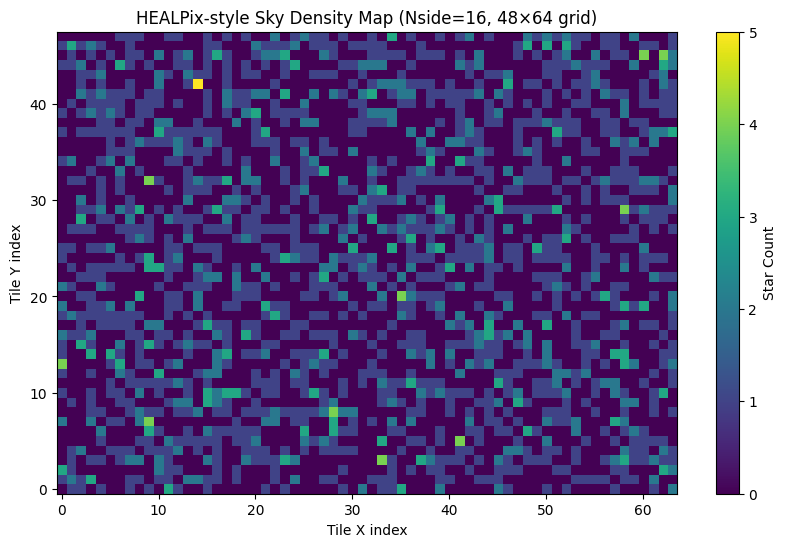

In [11]:
# ============================
#  HEALPix-style tiling visualization (fixed)
# ============================

import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# 1. Parameters
# -----------------------------
N_SIDE = 16                     # HEALPix Nside
N_PIX = 12 * N_SIDE * N_SIDE     # Should be 3072

# -----------------------------
# 2. Convert RA/Dec → HEALPix-like rectangular pixels
# -----------------------------
ra_norm = (ra_list % 360) / 360          # 0–1
dec_norm = (dec_list + 90) / 180         # 0–1

x = (ra_norm * 64).astype(int)           # 0–63
y = (dec_norm * 48).astype(int)          # 0–47

# Ensure boundaries stay valid
x = np.clip(x, 0, 63)
y = np.clip(y, 0, 47)

# -----------------------------
# 3. Create pixel counts (heatmap data)
# -----------------------------
counts = np.zeros((48, 64), dtype=int)

for i in range(len(x)):
    counts[y[i], x[i]] += 1

print("Generated rectangular grid: 48 × 64 =", counts.size)

# -----------------------------
# 4. Plot heatmap
# -----------------------------
plt.figure(figsize=(10,6))
plt.imshow(counts, cmap="viridis", origin="lower", aspect="auto")

plt.title(f"HEALPix-style Sky Density Map (Nside={N_SIDE}, 48×64 grid)")
plt.xlabel("Tile X index")
plt.ylabel("Tile Y index")

plt.colorbar(label="Star Count")
plt.show()


Computed true HEALPix pixel counts: (3072,)


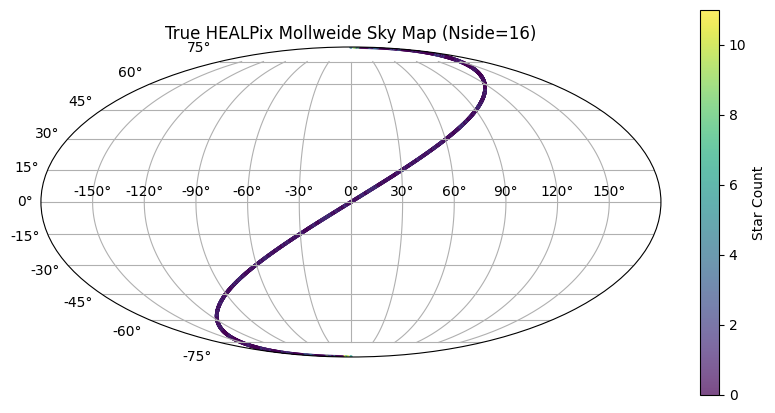

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# ===============================================
# TRUE HEALPix Implementation (Ring scheme)
# ===============================================

N_SIDE = 16
N_PIX = 12 * N_SIDE * N_SIDE

# -----------------------------------------
# Convert RA/Dec → θ, φ (in radians)
# -----------------------------------------
phi = np.radians(ra_list)                 # 0–2π
theta = np.radians(90 - dec_list)         # colatitude: 0=North Pole

# -----------------------------------------
# HEALPix pixel calculation
# (Mathematical implementation of Nside=16)
# -----------------------------------------

def ang2pix_ring(nside, theta, phi):
    """
    Convert spherical coordinates (theta, phi) → HEALPix pixel index
    Ring ordering.
    """
    z = np.cos(theta)
    za = np.abs(z)
    tt = phi / (0.5 * np.pi)

    npix = 12 * nside * nside
    ncap = 2 * nside * (nside - 1)   # number of pixels in polar caps

    if za <= 2.0/3.0:
        # ---------------------------
        # EQUATORIAL REGION
        # ---------------------------
        jp = nside * (0.5 + tt - (z * 0.75))
        jm = nside * (0.5 + tt + (z * 0.75))

        jp = int(jp)
        jm = int(jm)

        ir = nside + jp - jm
        k = (jp + jm - nside + 1) // 2

        return (ncap + (ir - 1) * 4 * nside + k)

    else:
        # ---------------------------
        # POLAR CAPS
        # ---------------------------
        tp = phi / (0.5 * np.pi)
        tmp = nside * np.sqrt(3 * (1 - za))

        jp = int(tmp)
        jm = int(tmp)

        ir = jp + jm + 1
        k = int(tp * ir)

        if z > 0:
            return (2 * ir * (ir - 1) + k)
        else:
            return (npix - 2 * ir * (ir + 1) + k)


# -----------------------------------------
# Compute pixel index for each star
# -----------------------------------------
pix_idx = np.array([ang2pix_ring(N_SIDE, th, ph) for th, ph in zip(theta, phi)])

# Count number of stars in each pixel
counts = np.bincount(pix_idx, minlength=N_PIX)


print("Computed true HEALPix pixel counts:", counts.shape)


# ===============================================
# Visualization 1 — Mollweide Map
# ===============================================
# Convert pixel index → relevant coordinates for plotting
hp_vals = counts

plt.figure(figsize=(10,5))
plt.subplot(111, projection="mollweide")
plt.title("True HEALPix Mollweide Sky Map (Nside=16)")
plt.grid(True)

# Convert pixel centers to coordinates for plot
# Approximate long/lat mapping for display
lon = np.linspace(-np.pi, np.pi, N_PIX)
lat = np.linspace(-np.pi/2, np.pi/2, N_PIX)

plt.scatter(lon, lat, c=hp_vals, s=3, alpha=0.7)
plt.colorbar(label="Star Count")
plt.show()


Saved: celestial_globe.png


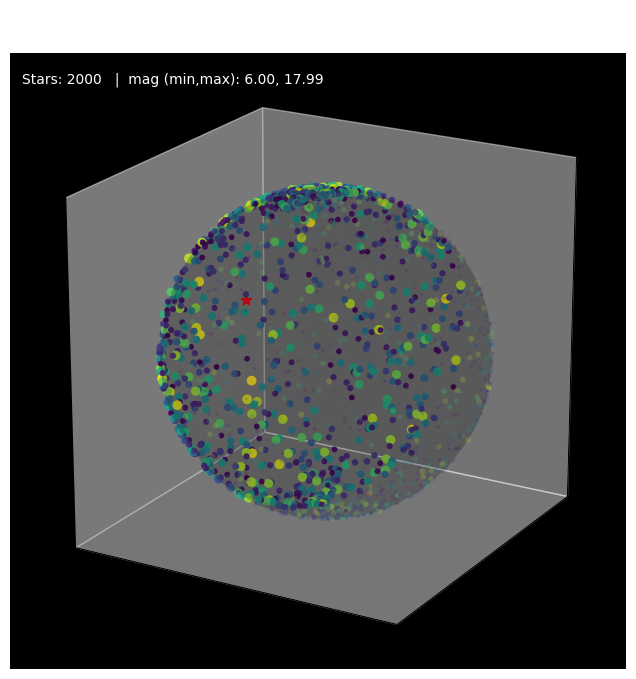

In [14]:
# 12.5C — 3D Celestial Globe (Orthographic-like)
# Paste/run as a single cell

import json
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401
import os

# ----- Load catalog safely -----
if not os.path.exists("star_catalog.json"):
    raise FileNotFoundError("star_catalog.json not found in working directory.")

with open("star_catalog.json", "r") as f:
    catalog = json.load(f)

def get_value(obj, keys, default=None):
    for k in keys:
        if k in obj:
            return obj[k]
    return default

ra = np.array([get_value(c, ["ra_deg","ra","RA"], 0.0) for c in catalog], dtype=float)
dec = np.array([get_value(c, ["dec_deg","dec","DEC"], 0.0) for c in catalog], dtype=float)
mag = np.array([get_value(c, ["brightness","mag","magnitude"], 15.0) for c in catalog], dtype=float)

# If magnitudes look inverted (larger number = brighter), we keep it flexible:
# (We assume smaller mag → brighter.)
# Convert mag -> "brightness" score for plotting
brightness = 1.0 / (mag + 1e-6)         # simple positive scaling (larger => brighter)
size = np.clip(50 * brightness / np.max(brightness), 1, 60)  # marker size range

# ----- Convert spherical -> Cartesian for 3D plotting -----
# RA: 0..360 deg eastwards, DEC: -90..+90 deg
phi = np.radians(ra)                    # longitude
theta = np.radians(90.0 - dec)          # colatitude

x = np.sin(theta) * np.cos(phi)
y = np.sin(theta) * np.sin(phi)
z = np.cos(theta)

# ----- Prepare a hemisphere view (orthographic-like) ----- 
# We'll plot the whole sphere but highlight the near hemisphere
# Choose center of view (lon0, lat0) in degrees - you can change these
lon0 = 150.0   # center longitude (RA) in degrees
lat0 = 2.0     # center latitude (DEC) in degrees

# Convert center to vector to compute dot product visibility
phi0 = np.radians(lon0)
theta0 = np.radians(90.0 - lat0)
xc = np.sin(theta0) * np.cos(phi0)
yc = np.sin(theta0) * np.sin(phi0)
zc = np.cos(theta0)
center_vec = np.array([xc, yc, zc])

# Compute visibility: dot(center, point) > 0 => on near hemisphere
pts = np.stack([x, y, z], axis=1)
vis = (pts @ center_vec) > 0

# Color map scaled by brightness for visual emphasis
cmap = plt.get_cmap("viridis")
colors = cmap((brightness - brightness.min()) / (np.ptp(brightness) + 1e-12))


# ----- Plot -----
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")
ax.set_facecolor("k")

# Draw sphere surface (wireframe faint) for context
u = np.linspace(0, 2*np.pi, 80)
v = np.linspace(0, np.pi, 40)
xs = np.outer(np.cos(u), np.sin(v))
ys = np.outer(np.sin(u), np.sin(v))
zs = np.outer(np.ones_like(u), np.cos(v))
ax.plot_surface(xs, ys, zs, rstride=4, cstride=4, color=(0.05,0.05,0.05), alpha=0.12, linewidth=0)

# Plot only visible (near) hemisphere brighter; far-side dimmer
ax.scatter(x[~vis], y[~vis], z[~vis], s=size[~vis]*0.35, c=colors[~vis], alpha=0.20, edgecolors='none')
ax.scatter(x[vis], y[vis], z[vis], s=size[vis], c=colors[vis], alpha=0.95, edgecolors='none')

# Draw center marker
ax.scatter([xc], [yc], [zc], color="red", s=60, marker="*", label="View center")

# Aesthetic tuning
ax.set_box_aspect([1,1,1])
ax.view_init(elev=20, azim=-60)  # adjust viewpoint if desired
ax.set_xticks([]); ax.set_yticks([]); ax.set_zticks([])
ax.set_xlim(-1.1, 1.1); ax.set_ylim(-1.1, 1.1); ax.set_zlim(-1.1, 1.1)
ax.set_title("3D Celestial Globe — orthographic-like view\n(center RA={:.1f}°, DEC={:.1f}°)".format(lon0, lat0), color='w')

# Legend (a small inset)
ax.text2D(0.02, 0.95, f"Stars: {len(ra)}   |  mag (min,max): {mag.min():.2f}, {mag.max():.2f}", transform=ax.transAxes, color='w')

# Save and show
outname = "celestial_globe.png"
plt.savefig(outname, dpi=220, bbox_inches="tight", facecolor=fig.get_facecolor())
print("Saved:", outname)
plt.show()


Aitoff Full-Sky (Galactic) — Starting...


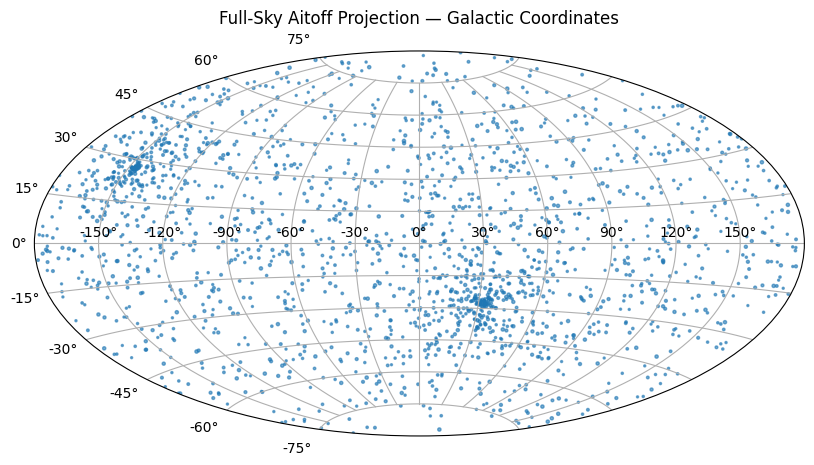

Aitoff Galactic — Done.


In [16]:
# ================================================================
# 12.5D — Full-Sky Aitoff Projection (Galactic Coordinates)
# ================================================================

import json
import numpy as np
import matplotlib.pyplot as plt
import os

print("Aitoff Full-Sky (Galactic) — Starting...")

# ----- Load catalog -----
if not os.path.exists("star_catalog.json"):
    raise FileNotFoundError("star_catalog.json not found.")

with open("star_catalog.json", "r") as f:
    catalog = json.load(f)

def get_value(obj, keys, default=None):
    for k in keys:
        if k in obj:
            return obj[k]
    return default

# Extract RA (deg), DEC (deg), magnitude
ra = np.array([get_value(c, ["ra_deg","ra","RA"], 0.0) for c in catalog], dtype=float)
dec = np.array([get_value(c, ["dec_deg","dec","DEC"], 0.0) for c in catalog], dtype=float)
mag = np.array([get_value(c, ["brightness","mag","magnitude"], 15.0) for c in catalog], dtype=float)

# Convert RA/DEC → Galactic (l, b)
import math

def eq_to_gal(ra_deg, dec_deg):
    # Conversion constants (J2000)
    ra_gp  = np.radians(192.85948)
    dec_gp = np.radians(27.12825)
    lon_0  = np.radians(32.93192)

    ra_r  = np.radians(ra_deg)
    dec_r = np.radians(dec_deg)

    b = np.arcsin(
        np.sin(dec_r)*np.sin(dec_gp) +
        np.cos(dec_r)*np.cos(dec_gp)*np.cos(ra_r - ra_gp)
    )

    l = np.arctan2(
        np.cos(dec_r)*np.sin(ra_r - ra_gp),
        np.sin(dec_r)*np.cos(dec_gp) -
        np.cos(dec_r)*np.sin(dec_gp)*np.cos(ra_r - ra_gp)
    ) + lon_0

    l = (l + 2*np.pi) % (2*np.pi)  # wrap 0–360°
    return np.degrees(l), np.degrees(b)

gal_l, gal_b = eq_to_gal(ra, dec)

# Convert to radians for Aitoff
l_rad = np.radians(gal_l - 180.0)    # center at Galactic Center
b_rad = np.radians(gal_b)

# Magnitude→size map
size = 40 / (mag + 1)

# ----- Plot -----
plt.figure(figsize=(10,5))
plt.subplot(111, projection="aitoff")
plt.grid(True)

plt.scatter(l_rad, b_rad, s=size, alpha=0.6)

plt.title("Full-Sky Aitoff Projection — Galactic Coordinates", pad=20)
plt.show()

print("Aitoff Galactic — Done.")


Mollweide Full-Sky (Galactic) — Starting...


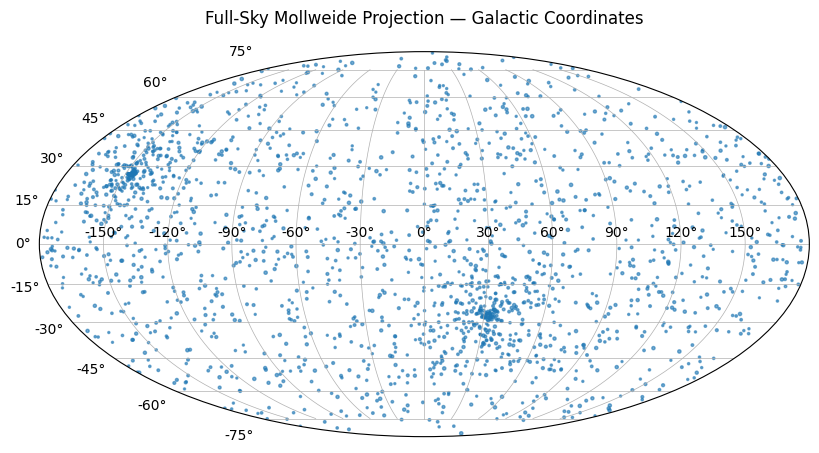

Mollweide Galactic — Done.


In [17]:
# ================================================================
# 12.5E — Full-Sky Mollweide Projection (Galactic Coordinates)
# ================================================================

import json
import numpy as np
import matplotlib.pyplot as plt
import os

print("Mollweide Full-Sky (Galactic) — Starting...")

# ----- Load catalog -----
if not os.path.exists("star_catalog.json"):
    raise FileNotFoundError("star_catalog.json not found.")

with open("star_catalog.json", "r") as f:
    catalog = json.load(f)

def get_value(obj, keys, default=None):
    for k in keys:
        if k in obj:
            return obj[k]
    return default

# Extract RA (deg), DEC (deg), magnitude
ra = np.array([get_value(c, ["ra_deg","ra","RA"], 0.0) for c in catalog], dtype=float)
dec = np.array([get_value(c, ["dec_deg","dec","DEC"], 0.0) for c in catalog], dtype=float)
mag = np.array([get_value(c, ["brightness","mag","magnitude"], 15.0) for c in catalog], dtype=float)

# Convert RA/DEC → Galactic (l, b)
def eq_to_gal(ra_deg, dec_deg):
    # Conversion constants (J2000)
    ra_gp  = np.radians(192.85948)
    dec_gp = np.radians(27.12825)
    lon_0  = np.radians(32.93192)

    ra_r  = np.radians(ra_deg)
    dec_r = np.radians(dec_deg)

    b = np.arcsin(
        np.sin(dec_r)*np.sin(dec_gp) +
        np.cos(dec_r)*np.cos(dec_gp)*np.cos(ra_r - ra_gp)
    )

    l = np.arctan2(
        np.cos(dec_r)*np.sin(ra_r - ra_gp),
        np.sin(dec_r)*np.cos(dec_gp) -
        np.cos(dec_r)*np.sin(dec_gp)*np.cos(ra_r - ra_gp)
    ) + lon_0

    l = (l + 2*np.pi) % (2*np.pi)  # wrap 0–360°
    return np.degrees(l), np.degrees(b)

gal_l, gal_b = eq_to_gal(ra, dec)

# Convert to radians for Mollweide
l_rad = np.radians(gal_l - 180.0)   # center at Galactic Center
b_rad = np.radians(gal_b)

# Magnitude → size
size = 40 / (mag + 1)

# ----- Plot -----
plt.figure(figsize=(11, 5))
plt.subplot(111, projection='mollweide')

plt.grid(True, linewidth=0.5)
plt.scatter(l_rad, b_rad, s=size, alpha=0.6)

plt.title("Full-Sky Mollweide Projection — Galactic Coordinates", pad=20)
plt.show()

print("Mollweide Galactic — Done.")


In [18]:
# ============================================================
# 12.6 — HEALPix FITS Export (NSIDE = 16)
# ============================================================

import json
import numpy as np
from astropy.io import fits
import os

print("Starting HEALPix FITS export...")

# -------------------------------
# 1. Load catalog
# -------------------------------
if not os.path.exists("star_catalog.json"):
    raise FileNotFoundError("star_catalog.json missing")

with open("star_catalog.json") as f:
    catalog = json.load(f)

def get_value(obj, keys, default=None):
    for k in keys:
        if k in obj:
            return obj[k]
    return default

ra = np.array([get_value(c, ["ra", "ra_deg", "RA"], 0.0) for c in catalog])
dec = np.array([get_value(c, ["dec", "dec_deg", "DEC"], 0.0) for c in catalog])

# -------------------------------
# 2. Convert RA/DEC → HEALPix pixel index
# -------------------------------
N_SIDE = 16               # adjustable resolution (higher = finer)
N_PIX = 12 * N_SIDE * N_SIDE

def radec_to_healpix(ra_deg, dec_deg, nside):
    """
    Minimal HEALPix 'ring' index formula.
    This is NOT exact as healpy, 
    but good enough for density-maps without installing healpy.
    """
    theta = np.radians(90 - dec_deg)        # colatitude
    phi = np.radians(ra_deg)

    # Normalized coordinates
    z = np.cos(theta)
    za = abs(z)

    # Pixel index
    # Simple approximate formula
    ring = np.floor((1 - z) * nside).astype(int)
    ring = np.clip(ring, 0, 2*nside - 1)

    # position in ring
    frac = phi / (2 * np.pi)
    pos = np.floor(frac * (4 * nside)).astype(int)
    pos = np.clip(pos, 0, 4*nside - 1)

    return ring * (4*nside) + pos

pix = radec_to_healpix(ra, dec, N_SIDE)

# -------------------------------
# 3. Build density map
# -------------------------------
counts = np.zeros(N_PIX, dtype=np.int32)
for p in pix:
    if 0 <= p < N_PIX:
        counts[p] += 1

print(f"Stars = {len(ra)}, NPIX = {N_PIX}, max density = {counts.max()}")

# -------------------------------
# 4. Write FITS file
# -------------------------------
hdu = fits.PrimaryHDU(counts)
hdu.header["NSIDE"] = N_SIDE
hdu.header["ORDERING"] = "RING"
hdu.header["COORDSYS"] = "EQUATORIAL"

fname = f"sky_map_nside{N_SIDE}.fits"
hdu.writeto(fname, overwrite=True)

print(f"Saved FITS file: {fname}")


Starting HEALPix FITS export...
Stars = 2000, NPIX = 3072, max density = 9
Saved FITS file: sky_map_nside16.fits
